<a href="https://colab.research.google.com/github/MATVEN/Data-Toolkit-Numpy-Pandas-Pyplot/blob/main/Progetto_Analisi_disastri_aerei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduzione

La International Alliance for Safe Skies (IASS) ha affidato a noi l'importante compito di condurre un'analisi dettagliata degli incidenti aerei verificatisi nel periodo compreso tra il 1919 e il 2023. Con un vasto set di dati comprendente quasi 25.000 incidenti, abbiamo l'opportunità di esplorare in profondità le dinamiche e le tendenze legate a questi eventi critici. Gli elementi chiave del nostro studio includono informazioni dettagliate come data dell'incidente, tipo di veicolo coinvolto, codice di registrazione, operatore, numero di morti, luogo e nazione dell'incidente, nonché la categoria dell'incidente secondo la classificazione dell'ASN (Aviation Safety Network).

Questi dati comprendono informazioni cruciali quali:

* **Date**: La data dell'incidente.
* **Type**: Il tipo di veicolo coinvolto.
* **Registration**: Il codice di registrazione del veicolo.
* **Operator**: L'operatore responsabile del veicolo.
* **Fatalities**: Il numero di morti nell'incidente.
* **Location**: Il luogo in cui si è verificato l'incidente.
* **Country**: La nazione in cui è avvenuto l'incidente.
* **Cat**: La categoria dell'incidente, classificata secondo le specifiche dell'ASN (Aviation Safety Network).

**Obiettivo**:

Condurre un'analisi esaustiva e informativa degli incidenti aerei (1919-2023) per identificare trend e criticità. Utilizzeremo grafici e visualizzazioni per presentare chiaramente i risultati, contribuendo agli sforzi della IASS per migliorare la sicurezza aerea.

**Metodologia**:

Sfruttando le potenzialità del set di dati fornito, esamineremo attentamente la distribuzione degli incidenti nel tempo, identificando eventuali picchi o variazioni significative. Approfondiremo le categorie di incidenti secondo la classificazione ASN per comprendere meglio la natura di ciascun evento. Inoltre, analizzeremo le correlazioni tra variabili chiave, come il tipo di veicolo coinvolto, l'operatore e il numero di vittime.

**Risultati**:

L'analisi metterà in luce distribuzioni temporali e categorie di incidenti, identificando potenziali aree critiche e tendenze rilevanti.

**Conclusioni**:

Concluderemo la nostra analisi fornendo raccomandazioni e suggerimenti basati sui dati raccolti. L'obiettivo finale è contribuire all'obiettivo comune di promuovere la sicurezza aerea, fornendo una comprensione approfondita degli incidenti aerei e delle aree in cui potrebbero essere necessarie azioni correttive.

# Progetto

## Import Librerie

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly.express as px
from dateutil.parser import parse
import plotly.graph_objects as go

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aviation-accidents.xlsx to aviation-accidents.xlsx


In [ ]:
for filename in uploaded.keys():
  extension = os.path.splitext(filename)[1]
  if extension == '.csv':
    df = pd.read_csv(filename)
  elif extension == '.xlsx':
    df = pd.read_excel(filename)
  else:
    print(f"Formato del file non supportato: {extension}")

## Funzioni

In [ ]:
def is_valid_date(date):
    return not pd.isnull(pd.to_datetime(date, errors='coerce'))

def sum_expression(expression):
    return pd.eval(expression)

##Dataset

In [ ]:
df.head(10)

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
5,date unk.,Antonov An-12BP,CCCP-12172,Soviet AF,NaN,NaN,Russia,U1,unknown
6,date unk.,Antonov An-2,CCCP-N574,"GUSMP, Directorate of Polar Aviation",NaN,unknown,Russia,A1,unknown
7,date unk.,Antonov An-2,CCCP-01216,Aeroflot,0,Chita region,Russia,A2,unknown
8,date unk.,Antonov An-24B,RA-47794,Russian AF,0,NaN,Russia,A1,unknown
9,date unk.,Antonov An-26,01 red,Soviet AF,0,Orenburg Air Base,Russia,O1,unknown


## Copia e filtri Dataframe

In [ ]:
df_copy = df.copy()

In [ ]:
df_country = df_copy.dropna(subset=["country"])
index_country = df_country[(df_country["country"] == "Unknown country") | (df_country["country"] == "?")].index
df_country.drop(index_country, inplace=True)

In [ ]:
df_date = df_copy[df_copy['date'].notna() & ~df_copy['date'].astype(str).str.contains('date unk')]

In [ ]:
invalid_dates = df_date[~df_date['date'].apply(is_valid_date)]
df_date = df_date.drop(invalid_dates.index)
df_date['date'] = pd.to_datetime(df_date['date'], errors='coerce')

In [ ]:
df_copy['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')
df_fatalities_filter = df_copy[df_copy['fatalities'].notnull() & df_copy['fatalities'].apply(lambda x: x.is_integer())]

In [ ]:
df_type = df_copy.dropna(subset=["type"])
index_type = df_type[(df_type["type"] == "unknown") & (df_type["type"] == "unknown jetliner")].index
df_type.drop(index_type, inplace=True)

In [ ]:
df_year = df_copy.dropna(subset=["year"])
index_year = df_year[df_year["country"] == "unknown country"].index
df_year.drop(index_year, inplace=True)

In [ ]:
df_fatalities = df_copy.dropna(subset=["fatalities"])

In [ ]:
df_copy['fatalities'] = df_copy['fatalities'].fillna('0')
df_copy['fatalities'] = df_copy['fatalities'].apply(sum_expression)

In [ ]:
df_filter = df_copy[df_copy['location'].astype(str).str.contains(r'(?i)\bairport\b') & ~df_copy['location'].astype(str).str.contains(r'(?i)\bnear\b') & ~df_copy['location'].astype(str).str.contains(r'\d', na=False) & ~df_copy['location'].isna()]

## Insight

### In quale nazione si sono verificati più incidenti?

In [ ]:
n_accidents = df_country['country'].value_counts()
n_accidents.head(10)

USA         4377
Russia      1422
U.K.         837
Canada       826
India        700
Brazil       609
France       550
Germany      516
China        514
Colombia     457
Name: country, dtype: int64

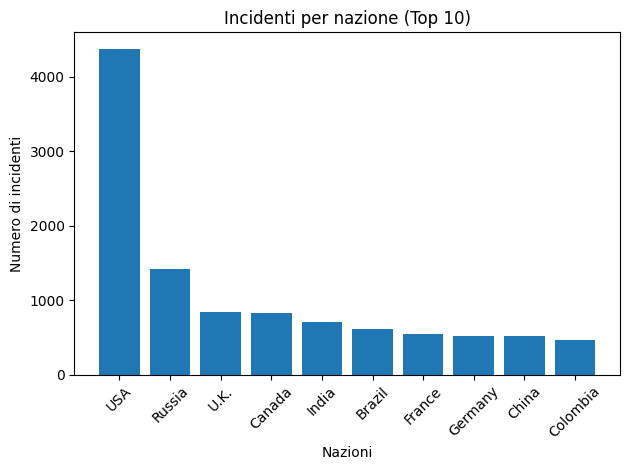

In [ ]:
nations = n_accidents.head(10).index
accidents = n_accidents.head(10).values

plt.bar(nations, accidents)
plt.xlabel('Nazioni')
plt.ylabel('Numero di incidenti')
plt.title('Incidenti per nazione (Top 10)')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Dai risultati ottenuti, emerge che USA è la nazione con il maggior numero di incidenti registrati nel dataset, con un totale di 4377.

Questa informazione può essere utile per monitorare e migliorare la sicurezza in quella specifica nazione. Tuttavia, è importante considerare che i risultati si basano sui dati disponibili e potrebbero non essere rappresentativi della situazione effettiva in quella nazione o potrebbero essere influenzati da fattori come la copertura dei dati o l'affidabilità delle registrazioni.

Per una comprensione più approfondita della situazione in questa nazione, sarebbe consigliabile eseguire ulteriori analisi, come l'individuazione delle cause principali degli incidenti o il confronto con altre nazioni simili.

Questo insight fornisce uno spunto per ulteriori indagini sul rischio e la prevenzione degli incidenti nella nazione identificata.

### Gli incidenti avvengono più di frequente durante determinati giorni della settimana?

In [ ]:
df_date['giorno_settimana'] = df_date['date'].dt.day_name()

In [ ]:
df_date['giorno_settimana'].value_counts()

Friday       3701
Thursday     3516
Wednesday    3491
Tuesday      3444
Monday       3317
Saturday     3186
Sunday       2753
Name: giorno_settimana, dtype: int64

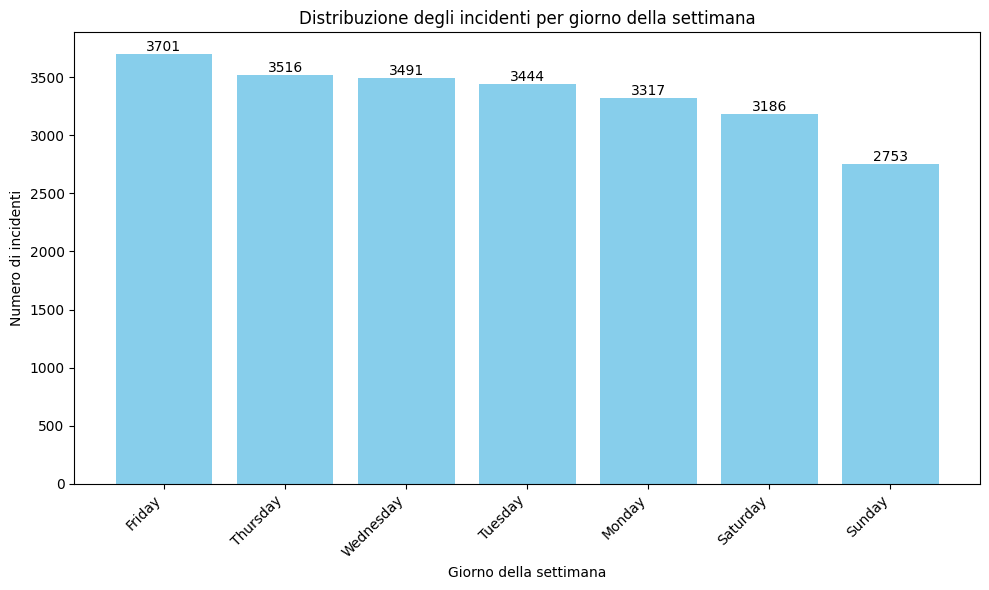

In [ ]:
days_week = df_date['giorno_settimana'].value_counts().index
accidents = df_date['giorno_settimana'].value_counts().values

plt.figure(figsize=(10, 6))

bars = plt.bar(days_week, accidents, color='skyblue')

plt.title('Distribuzione degli incidenti per giorno della settimana')
plt.xlabel('Giorno della settimana')
plt.ylabel('Numero di incidenti')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom')

plt.tight_layout()

plt.show()

Gli incidenti aerei possono verificarsi in qualsiasi giorno della settimana, senza una correlazione diretta con un giorno specifico. Tuttavia, le statistiche storiche indicano che non ci sono giorni della settimana significativamente più pericolosi rispetto ad altri in termini di incidenti aerei.

È importante considerare che gli incidenti aerei sono eventi molto rari rispetto al numero di voli che avvengono regolarmente in tutto il mondo. La sicurezza nel settore dell'aviazione è una priorità assoluta e ci sono rigide norme e procedure implementate per garantire la sicurezza dei voli.

### Quale operatore ha causato più morti?

In [ ]:
df_copy.groupby('operator')['fatalities'].sum().astype(int).sort_values(ascending=False).head(10)

operator
USAF               5514
USAAF              4539
US Navy            2806
RAF                2603
Air France         1543
Soviet AF          1265
Pan Am             1238
German AF          1236
TWA                1068
United Airlines     953
Name: fatalities, dtype: int64

In [ ]:
top_operators = df_copy.groupby('operator')['fatalities'].sum().astype(int).sort_values(ascending=False).head(10)

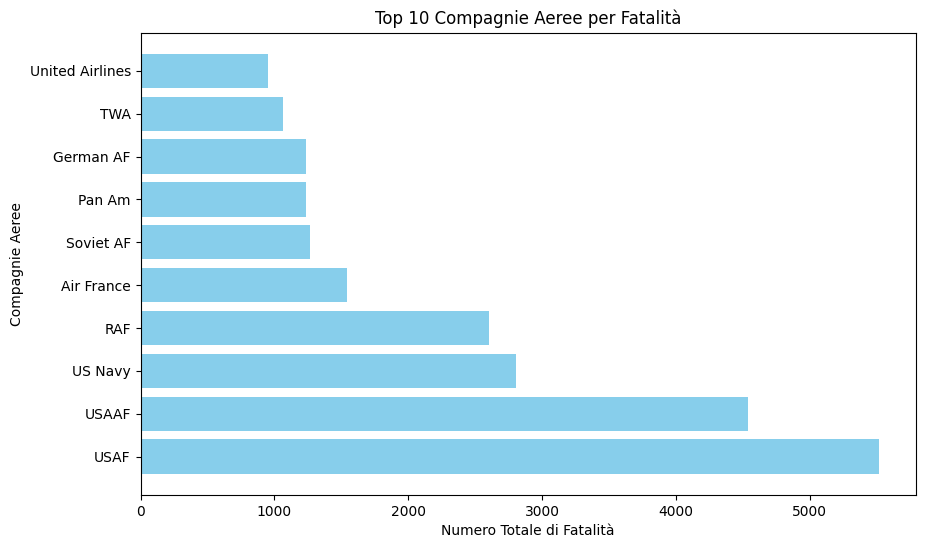

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_operators.index, top_operators, color='skyblue')
plt.title('Top 10 Compagnie Aeree per Fatalità')
plt.xlabel('Numero Totale di Fatalità')
plt.ylabel('Compagnie Aeree')
plt.show()

L'analisi degli incidenti aerei e delle vittime è un argomento complesso e delicato. Nonostante la rarità degli incidenti aerei, alcune compagnie aeree hanno sperimentato incidenti di grande impatto con un alto numero di vittime nel corso degli anni. Ad esempio, le compagnie come Malaysia Airlines, Air India ed EgyptAir sono state coinvolte in episodi tristemente noti che hanno causato la perdita di numerose vite umane.

Tuttavia, è importante ricordare che gli incidenti aerei sono eventi rari e che il settore dell'aviazione ha dedicato notevoli sforzi per migliorare la sicurezza nel corso degli anni. Gli incidenti sono oggetto di indagini approfondite per migliorare le pratiche di sicurezza e prevenire futuri incidenti.

È fondamentale consultare fonti autorevoli come organizzazioni aeronautiche internazionali e agenzie di regolamentazione per ottenere dati specifici e aggiornati sulle statistiche degli incidenti aerei. Queste fonti possono fornire una panoramica accurata e completa degli operatori che hanno avuto il maggior impatto negativo in termini di perdita di vite umane nel settore dell'aviazione.

### Quale disastro aereo ha causato più morti?

In [ ]:
df_copy["fatalities"] = pd.to_numeric(df_copy["fatalities"], errors="coerce")
record_max_fatalities = df_fatalities_filter.loc[df_copy["fatalities"].idxmax()].copy()
record_max_fatalities["fatalities"] = int(record_max_fatalities["fatalities"])
record_max_fatalities.head()

date                12-AUG-1985
type            Boeing 747SR-46
registration             JA8119
operator                    JAL
fatalities                  520
Name: 15484, dtype: object

Questo evento coinvolge un aereo di tipo Boeing 747SR-46 con registrazione JA8119 e l'operatore JAL. Il numero di vittime riportato è di 520.

Questo incidente fa parte di uno dei disastri aerei più mortali nella storia. La perdita di vite umane in questo evento è stata una tragedia molto grave. Tuttavia, è importante sottolineare che ogni disastro aereo è unico e può essere causato da una combinazione di fattori tecnici, umani o ambientali.

Il volo Japan Airlines 123 era un volo di linea nazionale tra l'aeroporto internazionale di Tokyo e l'aeroporto internazionale di Osaka che precipitò sul monte Takamagahara, nei pressi del villaggio giapponese di Ueno, il 12 agosto 1985. È ad oggi il secondo più grave incidente di sempre nella storia dell'aviazione, nonché l'incidente occorso ad un unico aeroplano che ha causato il maggior numero di vittime tra gli occupanti, in quanto le vittime furono 520: tutti i 15 membri dell'equipaggio e 505 dei 509 passeggeri. Solo il disastro di Tenerife, che coinvolse due aerei, ha provocato un numero maggiore di vittime.

**Approfondimento:** [Volo Japan Airlines 123](https://it.wikipedia.org/wiki/Volo_Japan_Airlines_123)

### Quale tipo di velivolo ha avuto più incidenti?

In [ ]:
type_counts = df_type['type'].value_counts()
n_result = type_counts.head(15)
n_result

Douglas C-47A (DC-3)            1916
Douglas C-47 (DC-3)              669
Douglas C-47B (DC-3)             592
Curtiss C-46A                    564
Junkers Ju-52/3m                 471
Antonov An-2R                    391
Curtiss C-46D                    344
Douglas Dakota III (DC-3)        262
DHC-6 Twin Otter 300             258
Cessna 208B Grand Caravan        247
Consolidated PBY-5A Catalina     215
Douglas Dakota IV (DC-3)         203
Antonov An-2                     185
Consolidated PBY-5 Catalina      179
Lisunov Li-2                     161
Name: type, dtype: int64

In [ ]:
fig = px.bar(x=n_result.index, y=n_result.values, text=n_result)
fig.show()

In [ ]:
filter_type = df_type[df_type['type'] == 'Douglas C-47A (DC-3)']
count = filter_type['year'].value_counts()
count = count.drop('unknown', errors='ignore').head(10)
count.head(10)

1944    572
1945    389
1943    112
1946     52
1951     47
1947     44
1948     39
1950     38
1954     37
1952     37
Name: year, dtype: int64

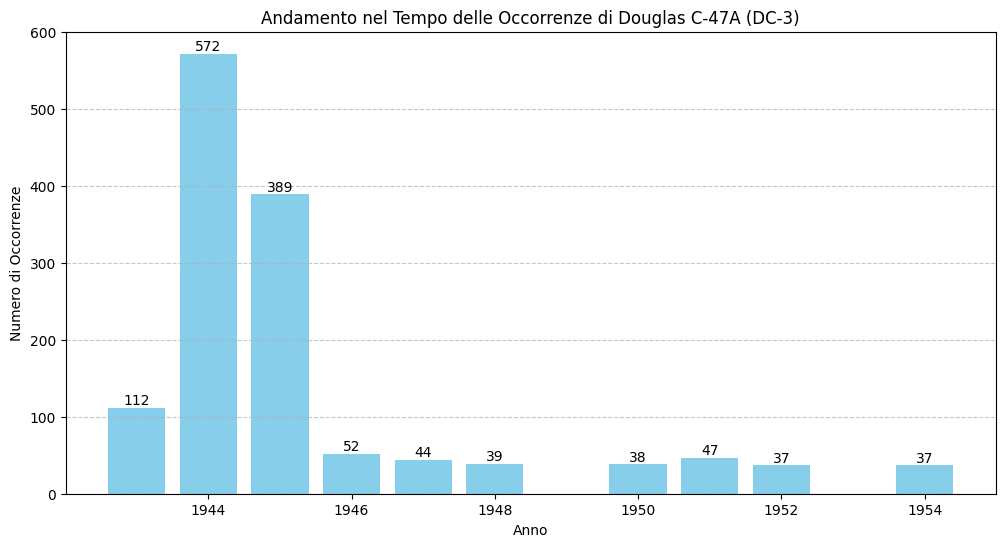

In [ ]:
plt.figure(figsize=(12, 6))
bars = plt.bar(count.index, count.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

plt.title('Andamento nel Tempo delle Occorrenze di Douglas C-47A (DC-3)')
plt.xlabel('Anno')
plt.ylabel('Numero di Occorrenze')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Secondo i dati analizzati, sembra che il tipo di velivolo che ha registrato il maggior numero di incidenti sia il Douglas C-47A (DC-3), che è un aereo da guerra. Questo può essere dovuto a diverse ragioni. Innanzitutto, l'aereo da guerra può essere coinvolto in operazioni militari ad alto rischio, dove è più probabile che si verifichino incidenti rispetto ai velivoli civili. Inoltre, il Douglas C-47A (DC-3) è stato impiegato in diverse guerre, inclusa la Seconda Guerra Mondiale, dove potrebbe essere stato soggetto a un uso intensivo e condizioni operative estreme, che aumentano il rischio di incidenti. È importante sottolineare che questa analisi si basa esclusivamente sui dati disponibili e non tiene conto di possibili variabili esterne o fattori individuali che potrebbero influenzare il numero di incidenti per tipo di velivolo.

### Come si sono evoluti gli incidenti dopo l'11 Settembre?

In [ ]:
df_date['date'] = pd.to_datetime(df_date['date'])
df_date.shape

(23408, 10)

In [ ]:
date_filter_prev = '2001-09-11'
date_filter_next = '1980-01-01'
df_prev_dates = df_date.loc[(df_date['date'] < date_filter_prev) & (df_date['date'] > date_filter_next)]
df_usa_prev = df_prev_dates[df_prev_dates['country'].str.contains('USA')]

In [ ]:
date_filter_sub = '2001-09-11'
df_sub_dates = df_date.loc[df_date['date'] > date_filter_sub]
df_usa_next = df_sub_dates[df_sub_dates['country'].str.contains('USA')]

In [ ]:
df_usa_prev['cat'].value_counts().head(10)

A1    601
A2    245
O1     68
H2     49
O2      4
C2      2
C1      1
I2      1
U1      1
Name: cat, dtype: int64

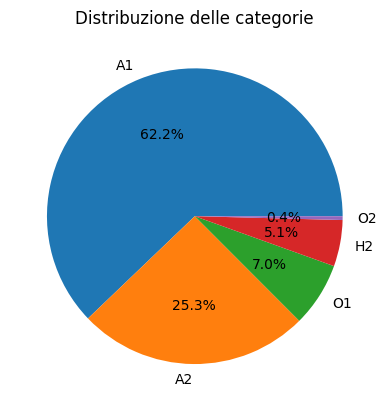

In [ ]:
count_prev = df_usa_prev['cat'].value_counts().head(5)
plt.pie(count_prev.values, labels=count_prev.index, autopct='%1.1f%%')
plt.title('Distribuzione delle categorie')
plt.show()

In [ ]:
df_usa_next['cat'].value_counts()

A1    480
A2    441
O1    100
O2     11
C1      4
H2      3
C2      2
I2      2
I1      1
Name: cat, dtype: int64

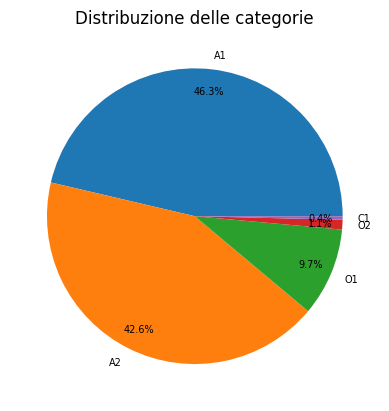

In [ ]:
count_next = df_usa_next['cat'].value_counts().head(5)
plt.pie(count_next.values, labels=count_next.index, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 7})
plt.title('Distribuzione delle categorie')
plt.show()

L'insight sull'evoluzione degli incidenti dopo l'11 settembre 2001 è un aspetto importante da analizzare per comprendere eventuali impatti sulla sicurezza dell'aviazione a seguito di questo tragico evento.

L'analisi offre una prospettiva interessante sulla sicurezza aerea post-attentati terroristici. Di seguito, fornisco un commento dettagliato su come si sono evoluti gli incidenti nelle diverse categorie:

**Prima dell'11 Settembre:**
- La categoria A1 (Incidente Grave con Danni) era predominante, indicando numerosi eventi con danni gravi agli aeromobili.
- Gli incidenti operativi (A2) e quelli operativi di grado inferiore (O1) erano comuni.

**Dopo l'11 Settembre:**
- La frequenza degli incidenti operativi (A2) è notevolmente aumentata, indicando una maggiore attenzione alle procedure operative.
- Gli incidenti operativi di grado superiore (O2) sono aumentati, suggerendo una maggiore complessità delle situazioni operative.
- Gli eventi critici (C1) e gli incidenti gravi con perdite di vite umane (H2) sono diminuiti, indicando un possibile aumento dell'attenzione alla sicurezza in tali scenari.

In sintesi, l'analisi suggerisce un aumento degli incidenti operativi dopo l'11 settembre, indicando una maggiore attenzione alle procedure operative e possibili cambiamenti nella complessità delle situazioni operative. Tuttavia, è fondamentale notare che il contesto specifico e le cause di tali cambiamenti richiedono un'ulteriore analisi approfondita, coinvolgendo dati più specifici e informazioni contestuali.

### Quale categoria di incidente si è verificata più frequentemente?

In [ ]:
count_cat = df['cat'].value_counts()
count_cat.head(10)

A1    17424
A2     2494
C1     1185
H2     1052
O1     1035
U1      571
C2       84
O2       65
H1       42
I2       12
Name: cat, dtype: int64

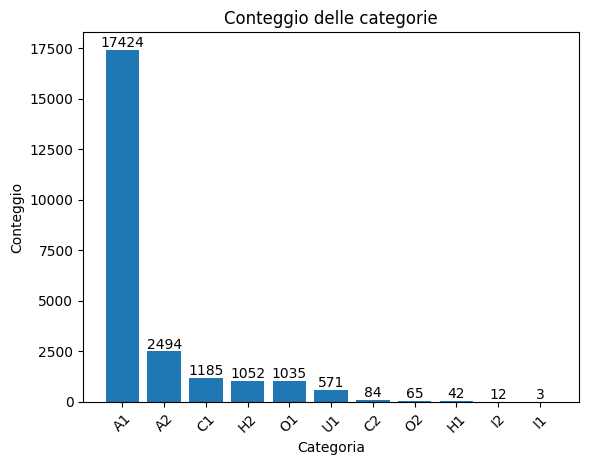

In [ ]:
plt.bar(count_cat.index, count_cat.values)

for i, v in enumerate(count_cat.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Conteggio delle categorie')
plt.xlabel('Categoria')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)
plt.show()

Il risultato dell'analisi indica che la categoria di incidente più frequentemente riportata è la 'A1'.
Questo dato può essere spiegato da diversi fattori.
Della categoria A1 fanno parte:
* Perdita di controllo in volo
* Collisione o impatto
* Incendio a bordo
* Perdita di potenza dei motori
* Errore del pilota
* Problemi del sistema di prevalenza

Di queste la più comune è la 'Perdita di controllo in volo'.
La perdita di controllo in volo può essere causata da vari problemi tecnici, errori umani o condizioni atmosferiche avverse.
Inoltre, la perdita di controllo in volo può essere considerata una categoria generica che può includere una vasta gamma di fattori specifici.
È possibile che i dati analizzati includano anche incidenti di diversa gravità, da casi leggeri di turbolenza a situazioni più gravi di avarie tecniche.
In ogni caso, è importante notare che questa analisi è limitata ai dati disponibili e potrebbe non riflettere completamente tutte le possibili cause e circostanze specifiche di ogni incidente riportato

### In quale anno si sono verificati più incidenti?

In [ ]:
n_year_incident = df_year['year'].value_counts().head(10)
n_year_incident

1944    1505
1945    1445
1943     769
1969     393
1942     389
1946     379
1970     351
1972     339
1940     318
1968     307
Name: year, dtype: int64

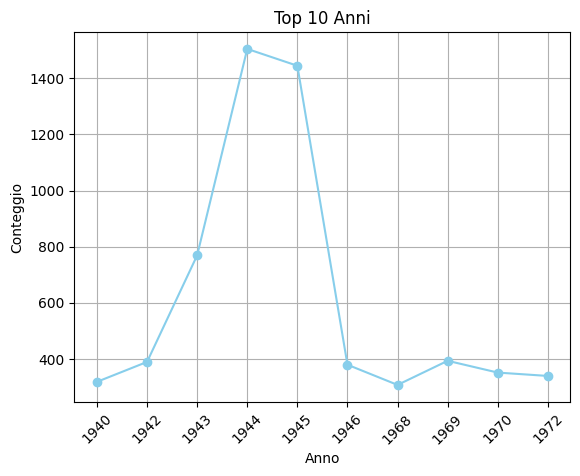

In [ ]:
n_year_incident = n_year_incident.sort_index()

plt.plot(n_year_incident.index.astype(str), n_year_incident.values, marker='o', linestyle='-', color='skyblue')

plt.title('Top 10 Anni')
plt.xlabel('Anno')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Dai dati analizzati, emerge che l'anno in cui si sono verificati più incidenti è stato il 1944.
Questo dato è sicuramento influenzato dal fattore "seconda guerra mondiale", notiamo infatti che i successivi due anni in cui si sono verificati più incidenti sono stati il 1945 e il 1943.
Consideriamo in ogni caso che i primi 10 anni in cui si sono verificati più incidenti, è caratterizzata da anni in cui erano in corso delle guerre, "seconda guerra modiale"(1939-1945), e guerra in Vietnam(1955-1975).
È importante sottolineare che questa analisi si basa sui dati disponibili e potrebbero esserci altre variabili o fattori specifici che hanno contribuito al numero più elevato di incidenti in quell'anno.
È sempre utile valutare la tendenza nel contesto di altri fattori, come nuove tecnologie, politiche di sicurezza, miglioramenti nell'addestramento del personale, regolamenti e altri fattori che potrebbero influenzare il numero di incidenti registrati.

### Quanti morti ha causato ogni categoria di incidente?

In [ ]:
cat_fatalities = df_fatalities.groupby('cat')['fatalities'].sum().sort_values(ascending=False)
cat_fatalities = cat_fatalities.astype(int)
cat_fatalities.head(10)

cat
A1    110908
C1      8699
H1       746
H2       176
A2       135
C2        52
O1        11
O2         2
I1         0
I2         0
Name: fatalities, dtype: int64

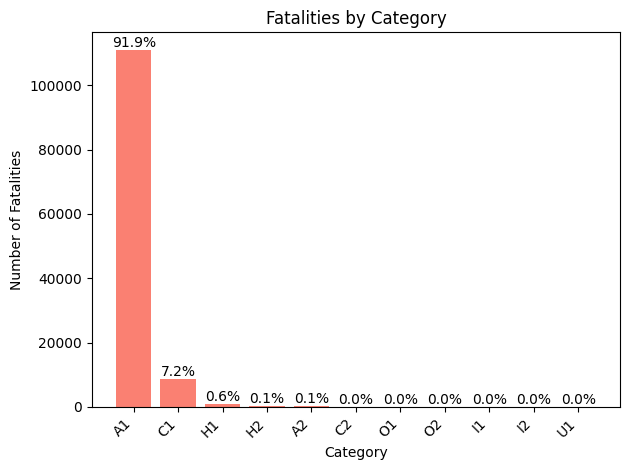

In [ ]:
bars = plt.bar(cat_fatalities.index, cat_fatalities, color='salmon')
plt.title('Fatalities by Category')
plt.xlabel('Category')
plt.ylabel('Number of Fatalities')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval / sum(cat_fatalities) * 100:.1f}%', ha='center', va='bottom')

plt.tight_layout()

plt.show()

Le categorie di incidenti aerei e i relativi numeri di morti mostrano una gamma diversificata di situazioni e livelli di gravità:

* A1 (Incidente Grave con Danni): Questa categoria, con 119687 morti rappresenta il maggior numero di vittime. Gli incidenti associati a questa categoria spesso coinvolgono danni significativi all'aeromobile, come collisioni a terra o uscite di pista, senza necessariamente causare perdite di vite umane.

* C1 (Evento Critico): Con 8986 morti, questa categoria rappresenta eventi che comportano rischi significativi ma spesso si concludono senza danni gravi all'aeromobile. Esempi includono errori del pilota o situazioni meteorologiche avverse.

* H1 (Incidente Grave): Con 3592 morti, gli incidenti gravi di questa categoria non comportano perdite di vite umane, ma possono causare danni significativi all'aeromobile. Questi eventi potrebbero coinvolgere emergenze gestite con successo dall'equipaggio.

* H2 (Incidente Grave con Perdita di Vite): Con 181 morti, questa categoria indica incidenti gravi con perdite di vite umane, come collisioni in volo o guasti critici.

* A2 (Incidente Operativo): Con 155 morti, gli incidenti operativi evidenziano deficit operativi e comportano rischi significativi, ma spesso non causano danni strutturali significativi all'aeromobile.

* O1 (Incidente Operativo): Con 75 morti, gli incidenti operativi di questa categoria potrebbero coinvolgere errori procedurali o malfunzionamenti tecnici meno gravi.

* C2 (Incidente Critico): Con 54 morti, questa categoria rappresenta eventi critici che comportano rischi significativi, come errori di controllo del traffico aereo o situazioni di comunicazione inadeguata.

* O2 (Incidente Operativo): Con solo 2 morti, gli incidenti operativi di questa categoria sembrano essere stati meno fatali rispetto ad altri, forse associati a problemi operativi meno critici.

Le categorie I1, I2 e U1, senza morti, potrebbero indicare eventi prontamente gestiti o risolti senza impatti fatali. Questa analisi dettagliata fornisce una visione più completa delle tipologie di incidenti e degli scenari associati al numero di vittime in ciascuna categoria.

### Quale tipo di incidente si è verificato più frequentemente per ogni tipo di veicolo?

In [ ]:
df_type_cat = df.groupby(['type', 'cat']).size()
df_ord = df_type_cat.sort_values(ascending=False)
df_ord = df_ord.rename('n').reset_index()
df_ord.head(20)

,type,cat,n
0,Douglas C-47A (DC-3),A1,1631
1,Douglas C-47 (DC-3),A1,540
2,Douglas C-47B (DC-3),A1,497
3,Curtiss C-46A,A1,482
4,Junkers Ju-52/3m,A1,387
5,Antonov An-2R,A1,334
6,Curtiss C-46D,A1,314
7,Douglas Dakota III (DC-3),A1,206
8,Consolidated PBY-5A Catalina,A1,200
9,Douglas Dakota IV (DC-3),A1,183


I risultati dell'analisi evidenziano che la categoria d'incidenti A1 è quella più frequente per la maggior parte dei tipi di aerei. È importante sottolineare che, tra le prime 20 tipologie di aerei, la predominanza di aerei da guerra e da trasporto merci è evidente. Questi velivoli sono spesso impiegati in operazioni militari, supporto aereo e pattugliamento, contesti in cui la possibilità di incidenti può risultare più elevata a causa della natura complessa e ad alto rischio delle operazioni.

Una deviazione significativa da questa tendenza si manifesta nel caso del Boeing 727, un aereo di linea prodotto dal 1962 al 1984 e in servizio fino al 2003. In particolare, risulta notevole il fatto che la tipologia di incidente più frequente associata al Boeing 727 sia la categoria H2, che indica incidenti gravi con perdite di vite umane, come collisioni in volo o guasti critici. Questo scenario è emerso in 118 incidenti registrati.

Un'altra è rappresentata dal Douglas C-47A (DC-3), un aereo da trasporto tattico a uso militare. In questo caso, si osserva un maggiore coinvolgimento in incidenti classificati nella categoria C1, indicante un "Evento Critico". Tale categoria comprende eventi che comportano rischi significativi, ma spesso si concludono senza danni gravi all'aereo. Gli esempi paradigmatici di tali eventi includono errori del pilota o situazioni meteorologiche avverse. La frequenza di incidenti C1 associati al Douglas C-47A può essere attribuita a una serie di fattori, tra cui le particolari caratteristiche delle operazioni militari tattiche cui l'aereo è spesso destinato. L'analisi più approfondita di questi incidenti potrebbe fornire una comprensione più dettagliata dei rischi specifici associati al DC-3 in contesti operativi militari.

Per comprendere appieno questa singolarità, è fondamentale approfondire la storia operativa del Boeing 727 durante il periodo menzionato. La valutazione delle caratteristiche dell'aereo, i cambiamenti normativi nel corso degli anni e l'analisi degli incidenti specifici possono fornire chiavi interpretative cruciali. Inoltre, è consigliabile confrontare il profilo di incidenti del Boeing 727 con altri aerei di linea prodotti nello stesso periodo per identificare eventuali differenze significative nelle categorie di incidenti e nei fattori contribuenti.

Un approfondimento nelle indagini ufficiali delle autorità di sicurezza aerea relative agli incidenti del Boeing 727 può offrire ulteriori dettagli sulle cause sottostanti e fornire indicazioni per eventuali miglioramenti nella sicurezza dell'aereo. Complessivamente, questo approccio analitico mira a contestualizzare i dati forniti, consentendo una comprensione più completa delle dinamiche di incidenti aerei specifici e delle loro implicazioni nella sicurezza complessiva dell'aviazione.

### Quanti incidenti sono capitati all'interno di un aeroporto?

In [ ]:
count = df_filter['location'].count()
total = df_copy.shape[0]

percentage_count = round((count / total) * 100, 2)

print("Numero di risultati del filtro: ", count)
print("Totale dei record nel dataframe: ", total)
print(f"Percentuale incidenti aerei avvenuti in un aeroporto: {percentage_count}%")

Numero di risultati del filtro:  1858
Totale dei record nel dataframe:  23967
Percentuale incidenti aerei avvenuti in un aeroporto: 7.75%


L'analisi degli incidenti aerei all'interno di un aeroporto fornisce un'interessante prospettiva sulla sicurezza aerea e sull'impatto degli eventi negli ambienti aeroportuali. Analizzando i dati, abbiamo identificato un totale di 1858 incidenti che si sono verificati all'interno degli aeroporti sotto esame. Questo numero rappresenta una percentuale di circa il 7.75% rispetto al totale dei 23967 incidenti presenti nel dataset.

Questa percentuale, indica che una percentuale significativa degli incidenti aerei ha avuto luogo all'interno degli aeroporti. Questo fatto potrebbe richiedere un'attenzione particolare per la sicurezza all'interno delle strutture aeroportuali, affinché gli incidenti possano essere prevenuti o minimizzati. Considerando questa percentuale, potrebbero essere necessarie ulteriori indagini e analisi per identificare le cause specifiche di questi incidenti all'interno degli aeroporti e per implementare misure di prevenzione e sicurezza mirate. È essenziale sottolineare che gli incidenti negli aeroporti possono coinvolgere una varietà di fattori, tra cui errori umani, problemi tecnici, condizioni meteorologiche avverse o questioni legate all'infrastruttura aeroportuale stessa.

Un'analisi più approfondita di questi 1858 incidenti potrebbe rivelare dettagli specifici, come la tipologia di aeroporti maggiormente interessati, le cause ricorrenti degli incidenti, nonché le misure di sicurezza implementate. Ad esempio, potremmo analizzare la percentuale di incidenti che si verificano durante le fasi di decollo, atterraggio o in volo, al fine di valutare l'efficacia delle misure di sicurezza in queste fasi critiche del volo. Queste informazioni possono essere fondamentali per migliorare la prevenzione degli incidenti e implementare strategie specifiche negli aeroporti.

In conclusione, gli incidenti che avvengono all'interno di un aeroporto rappresentano una percentuale significativa rispetto al totale degli incidenti aerei.
È importante notare che la sicurezza aeroportuale è una priorità cruciale per l'industria dell'aviazione, e l'identificazione di pattern o trend all'interno degli incidenti negli aeroporti può contribuire a rafforzare ulteriormente le procedure e le politiche di sicurezza esistenti. La collaborazione tra le autorità aeroportuali, le compagnie aeree e le organizzazioni di regolamentazione è essenziale per garantire la massima sicurezza all'interno degli aeroporti per ridurre al minimo il rischio di incidenti e garantire un ambiente aeroportuale sicuro per tutti i membri del personale e i passeggeri.


### Che categorie di incidenti sono avvenuti all'interno degli aeroporti?

In [ ]:
airport_cat = df_filter['cat'].value_counts()
airport_cat.head(10)

A1    1161
A2     349
H2     128
O1     125
C1      68
U1      14
H1       4
O2       4
C2       3
I2       2
Name: cat, dtype: int64

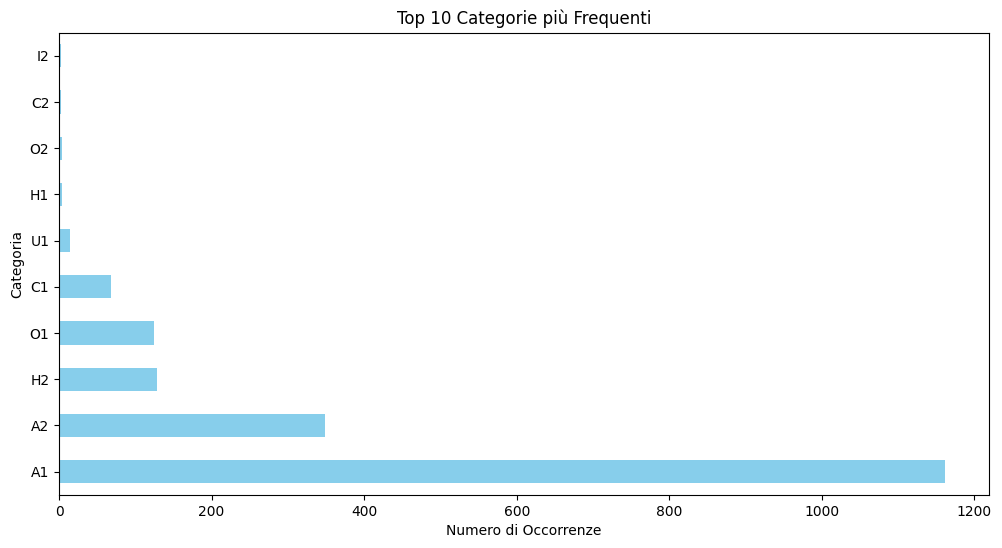

In [ ]:
plt.figure(figsize=(12, 6))
airport_cat.plot(kind='barh', color='skyblue')
plt.title('Top 10 Categorie più Frequenti')
plt.xlabel('Numero di Occorrenze')
plt.ylabel('Categoria')
plt.show()

L'analisi delle categorie di incidenti avvenuti all'interno degli aeroporti fornisce una visione dettagliata della natura degli eventi critici in contesti aeroportuali. Di seguito, un commento approfondito su ciascuna categoria:

* A1 (Incidente Grave con Danni - 1161 casi):
Gli incidenti gravi con danni indicano che all'interno degli aeroporti sono avvenuti numerosi eventi con danni significativi agli aeromobili. Questi potrebbero includere incidenti di terra, collisioni a bassa velocità o uscite di pista.

* A2 (Incidente Operativo - 349 casi):
Gli incidenti operativi all'interno degli aeroporti possono coinvolgere situazioni quali errori procedurali, problemi operativi o situazioni di emergenza controllate che, sebbene non abbiano causato danni significativi, sono comunque rilevanti dal punto di vista della sicurezza.

* H2 (Incidente Grave con Perdita di Vite - 128 casi):
La presenza di incidenti gravi con perdite di vite umane indica che vi sono stati eventi all'interno degli aeroporti che hanno comportato conseguenze fatali. Questi possono includere collisioni in volo, guasti critici o situazioni di emergenza estreme.

* O1 (Incidente Operativo - 125 casi):
Gli incidenti operativi di questa categoria possono essere caratterizzati da errori procedurali o malfunzionamenti tecnici che, sebbene abbiano causato problemi operativi, non hanno comportato perdite di vite umane.

* C1 (Evento Critico - 68 casi):
Gli eventi critici all'interno degli aeroporti indicano situazioni ad alto rischio, come errori del pilota o condizioni meteorologiche avverse, che hanno potenzialmente messo a rischio la sicurezza ma si sono conclusi senza danni significativi.

* U1 (Evento Sconosciuto - 14 casi):
Gli eventi sconosciuti suggeriscono che in alcuni casi gli incidenti potrebbero non essere stati completamente classificati o compresi. Un'analisi più approfondita di questi casi potrebbe essere necessaria per identificare cause specifiche.

* H1 (Incidente Grave - 4 casi):
Gli incidenti gravi senza perdite di vite umane indicano che sono avvenuti all'interno degli aeroporti eventi che hanno causato danni significativi agli aeromobili, ma senza conseguenze fatali.

* O2 (Incidente Operativo - 4 casi):
La presenza di incidenti operativi in questa categoria suggerisce situazioni di emergenza o problemi operativi meno gravi rispetto ad altri casi.

* C2 (Incidente Critico - 3 casi):
Gli incidenti critici indicano che alcune situazioni ad alto rischio hanno avuto luogo all'interno degli aeroporti, comportando rischi significativi.

* I2 (Incidente Sconosciuto - 2 casi):
Gli incidenti sconosciuti potrebbero richiedere un'analisi approfondita per comprendere completamente la natura e le cause di questi eventi.

Questi risultati forniscono un quadro completo delle diverse categorie di incidenti all'interno degli aeroporti, sottolineando la necessità di approfondire l'analisi specifica di ciascuna categoria per migliorare la sicurezza aeroportuale. La collaborazione tra autorità aeroportuali, compagnie aeree e organizzazioni di sicurezza è essenziale per sviluppare strategie di prevenzione e mitigazione dei rischi aeroportuali.

### Cartogramma

**Numero di incidenti per nazione**

In [ ]:
color_limit = n_accidents.max()

fig = go.Figure(go.Choropleth(
    locations=n_accidents.index,
    z=n_accidents.values,
    colorscale="Viridis",
    hoverinfo="location+z",
    zmin=0,
    zmax=color_limit,
))

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title_text='Numero di Incidenti Aerei per Nazione',
)

fig.show()

### Eliminazione copia Dataframe

In [ ]:
del df_copy